In [574]:
%matplotlib inline

import json
import pandas as pd
import numpy as np
import collections
import glob
import spacy

import matplotlib.pyplot as plt
import geopandas as gpd
# import geoplot as gpltb
import folium
from branca.utilities import split_six
import branca
from geojson_utils import centroid

from collections import Counter

import seaborn as sns
sns.set(style="white")

In [4]:
nlp = spacy.load('en_core_web_sm')

/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [5]:
def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [6]:
def get_jsons_to_df(folder='./raw_data/all.json'):
    dfs = []
    for path in glob.glob(folder):
        with open(path, 'rb') as fp:
            rise_attendees = json.load(fp)
            rise_attendees_flat = [ flatten(obj)
                           for obj in rise_attendees['results'][0]['hits']]
            df = pd.DataFrame(rise_attendees_flat)
            dfs.append(df)

    df_all = pd.concat(dfs).reset_index().drop('index', axis=1)
    return df_all

In [7]:
df = get_jsons_to_df()

In [8]:
df = df[[col for col in df.columns if not col.startswith('_')]]

In [9]:
df_statups = df[~df['tracks_rise18'].isin(['Exhibitor', 'Media Partner'])]

In [10]:
df_statups

,city,country,elevator_pitch,external_urls_angellist,external_urls_crunchbase,external_urls_facebook,external_urls_homepage,external_urls_linkedin,external_urls_press_release,external_urls_twitter,...,name,objectID,tracks_cc18,tracks_fnola18,tracks_monc17,tracks_monc18,tracks_rise17,tracks_rise18,tracks_ws17,tracks_ws18
74,Singapore,Singapore,Stamp up your business with Echoss Stamp Solut...,None,None,https://www.facebook.com/EchossStamp,http://www.12cmglobal.com,https://www.linkedin.com/company/12cm-global-p...,None,None,...,12CM Global PTE. LTD.,629ddebb-3b96-42b3-b8bf-fc153bc5bae5,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
75,San Francisco,United States of America,"Transactions made simple, fast, and repeatable...",https://angel.co/anduin-transactions,https://www.crunchbase.com/organization/anduin,None,https://www.anduintransact.com,https://www.linkedin.com/company/anduin-transa...,None,https://twitter.com/anduintransact,...,Anduin Transactions,697a6901-7093-4161-8ee9-3e1c05ee43c4,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
76,Minsk,Belarus,"Machine learning, AR & facial recognition prod...",None,None,https://www.facebook.com/banubaapp,https://banuba.com,https://www.linkedin.com/company/banuba-develo...,None,None,...,Banuba,559b683a-ba78-4748-86e5-f51016f276db,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
77,Manila,Philippines,The largest homegrown e-commerce company in th...,None,None,None,https://beautymnl.com,None,None,https://twitter.com/beauty_MNL,...,BeautyMNL,65de80fc-b34e-4bcc-b14c-2ce0fd3302a0,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
78,Hong Kong,Hong Kong,BloomMe is the leading spa and beauty booking ...,https://angel.co/bloomme-1,https://www.crunchbase.com/organization/bloomme,https://www.facebook.com/BloomMeHK,http://www.bloomme.com.hk,https://www.linkedin.com/company/bloomme-hong-...,None,None,...,BloomMe Ltd.,30b79e6e-420f-4759-8034-133cfac46a25,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
79,Jakarta,Indonesia,Brambang.com is an e-commerce company pioneeri...,None,None,None,https://www.brambang.com,None,None,None,...,Brambang.com,4317595f-83c2-4304-bad9-fd15eba5ba9b,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
80,Redwood City,United States of America,The best mobile linking platform with solution...,https://angel.co/branch-metrics,https://www.crunchbase.com/organization/branch...,www.facebook.com/branchmetrics/,https://branch.io,https://www.linkedin.com/company/branch-metrics,None,https://twitter.com/branchmetrics,...,Branch,0e2ffb33-c369-4600-85ed-011baf562238,NaN,NaN,NaN,NaN,START,GROWTH,Exhibitor,NaN
81,Zug,Switzerland,Datum is creating a global data exchange by tu...,None,None,https://www.facebook.com/datumnetwork/,https://datum.org,https://www.linkedin.com/company/13372038/,https://www.cio.com/article/3224533/data-manag...,@datumnetwork,...,Datum,6b64b397-ac14-4ba2-9cd4-3c11421ef040,NaN,NaN,NaN,NaN,NaN,GROWTH,ALPHA,NaN
82,Chennai,India,DiscoveryIoT helps brands track their products...,None,None,https://www.facebook.com/DiscoveryIoTnetwork,https://discoveryiot.com/,https://www.linkedin.com/company/discoveryiot,https://readwrite.com/2018/05/24/iot-solution-...,https://twitter.com/discovery_iot,...,DiscoveryIoT,57f3351c-6770-41fa-9459-87bf1994ca61,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
83,San Francisco,United States of America,Artificial Intelligence-AI platform tapping in...,https://angel.co/dotinus,https://www.crunchbase.com/organization/dotin-...,https://www.facebook.com/dotin.us,http://dotin.us,https://www.linkedin.com/company/10698682,https://angel.co/dotinus,https://twitter.com/dotin_us,...,dotin.us,fbb6951b-3a48-4a11-ba91-378a1834728c,GROWTH,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN


In [815]:
df_statups.to_csv('./df_statups.csv')

In [11]:
df_statups.head(2).T

,74,75
city,Singapore,San Francisco
country,Singapore,United States of America
elevator_pitch,Stamp up your business with Echoss Stamp Solut...,"Transactions made simple, fast, and repeatable..."
external_urls_angellist,None,https://angel.co/anduin-transactions
external_urls_crunchbase,None,https://www.crunchbase.com/organization/anduin
external_urls_facebook,https://www.facebook.com/EchossStamp,None
external_urls_homepage,http://www.12cmglobal.com,https://www.anduintransact.com
external_urls_linkedin,https://www.linkedin.com/company/12cm-global-p...,https://www.linkedin.com/company/anduin-transa...
external_urls_press_release,None,None
external_urls_twitter,None,https://twitter.com/anduintransact


In [623]:
def plot_industry_country(df,
                          threshold,
                          column_order=None,
                          index_order=None,
                          column='country',
                          index='industries_rise18',
                          value='name',
                          aggfunc='size',
                          percentage=False,
                          percentage_axis=0,
                          transpose=False,
                          show_values=False,
                          n_colors=7,
                          title='',
                          vmin=None,
                          vmax=None,
                          fmt='.0f',
                         ):
    df_industries_country = df.pivot_table(columns=[column],
                                           index=[index],
                                           values=[value],
                                           aggfunc=aggfunc)
    df_industries_country = df_industries_country[df_industries_country > threshold]
    
    if percentage:
        df_industries_country = df_industries_country.transform(lambda x: x/x.sum(), axis=percentage_axis)
    
    if column_order is None:
        column_order = df_industries_country.columns
    if index_order is None:
        index_order = df_industries_country.index.tolist()
        
    if transpose:
        df = df_industries_country.T.loc[column_order, index_order]
    else:
        df = df_industries_country.loc[index_order, column_order]
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 15))

    # Generate a custom diverging colormap
#     cmap = sns.diverging_palette(220, 10, as_cmap=True)
#     cmap = sns.light_palette((210, 90, 60), input="husl")
    cmap = sns.color_palette("BuGn", n_colors)

        
    sns.heatmap(df,
                cmap=cmap,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .5},
                yticklabels=1,
                annot=show_values,
                vmin=vmin,
                vmax=vmax,
                fmt=fmt,
               ).set_title(title)

In [229]:
sort_by_country = df_statups.groupby('country').size().sort_values(ascending=False).index.tolist()
sort_by_industry = df_statups.groupby('industries_rise18').size().sort_values(ascending=False).index.tolist()

In [12]:
columns = ['name', 'external_urls_homepage', 'funding_tier', 'industries_rise18', 'city', 'country', 'elevator_pitch']
df_statups[columns]

,name,external_urls_homepage,funding_tier,industries_rise18,city,country,elevator_pitch
74,12CM Global PTE. LTD.,http://www.12cmglobal.com,None,"Advertising, content & marketing",Singapore,Singapore,Stamp up your business with Echoss Stamp Solut...
75,Anduin Transactions,https://www.anduintransact.com,None,Fintech,San Francisco,United States of America,"Transactions made simple, fast, and repeatable..."
76,Banuba,https://banuba.com,None,"Gaming, VR & AR",Minsk,Belarus,"Machine learning, AR & facial recognition prod..."
77,BeautyMNL,https://beautymnl.com,USD 1m+,eCommerce & retail,Manila,Philippines,The largest homegrown e-commerce company in th...
78,BloomMe Ltd.,http://www.bloomme.com.hk,USD 1m+,Enterprise software solutions,Hong Kong,Hong Kong,BloomMe is the leading spa and beauty booking ...
79,Brambang.com,https://www.brambang.com,USD 1m+,eCommerce & retail,Jakarta,Indonesia,Brambang.com is an e-commerce company pioneeri...
80,Branch,https://branch.io,USD 1m+,Enterprise software solutions,Redwood City,United States of America,The best mobile linking platform with solution...
81,Datum,https://datum.org,USD 1m+,Fintech,Zug,Switzerland,Datum is creating a global data exchange by tu...
82,DiscoveryIoT,https://discoveryiot.com/,USD 500k - USD 1m,Enterprise software solutions,Chennai,India,DiscoveryIoT helps brands track their products...
83,dotin.us,http://dotin.us,USD 1m+,AI & machine learning,San Francisco,United States of America,Artificial Intelligence-AI platform tapping in...


In [13]:
df_statups.groupby(['funding_tier']).size().to_frame('count').sort_values('count', ascending=False)

,count
funding_tier,
USD 0 - USD 250k,279
Not specified,102
USD 1m+,92
USD 250k - USD 500k,92
USD 500k - USD 1m,57


In [309]:
df_statups_by_country = df_statups.groupby(['country']).size().to_frame('count').sort_values('count', ascending=False)

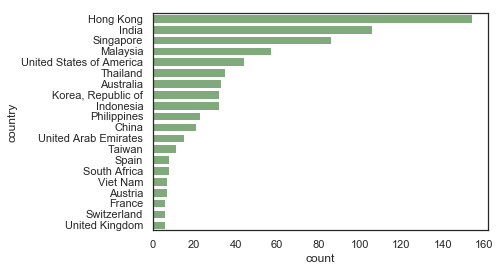

In [806]:
sns.barplot(x='count', y=df_statups_by_country.head(20).index, data=df_statups_by_country.head(20), palette=sns.xkcd_palette(['faded green']))

In [814]:
df_statups_by_country

,count
country,
Hong Kong,154
India,106
Singapore,86
Malaysia,57
United States of America,44
Thailand,35
Australia,33
"Korea, Republic of",32
Indonesia,32


In [527]:
# https://gis.stackexchange.com/questions/212796/get-lat-lon-extent-of-country-from-name-using-python
def get_boundingbox_country(country, output_as='boundingbox'):
    """
    get the bounding box of a country in EPSG4326 given a country name

    Parameters
    ----------
    country : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]

    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url_city = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?city=',
                             country,
                             '&format=json&polygon=0')
    url_country = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                         country,
                         '&format=json&polygon=0')
    
    response_url_country = requests.get(url_country).json()
    response_url_city = requests.get(url_city).json()
    try:
        response = (response_url_country + response_url_city)[0]
    except:
        print('unable to get '+country)
        return None
    

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

In [521]:
funding_tier_order = list(reversed([
'Not specified',
'USD 0 - USD 250k',
'USD 250k - USD 500k',
'USD 500k - USD 1m',
'USD 1m+',
]))

def add_country_tooltip(m, centroid_obj, df):
    country = centroid_obj['country']
    df_for_country = df[df['country'].isin([country])]
    company_count = df_for_country.shape[0]
    funding_tier_stat = (df_for_country.groupby(['funding_tier'])
        .size().to_frame('count'))
    funding_tier_stat = (
        funding_tier_stat.loc[[tier for tier in funding_tier_order if tier in funding_tier_stat.index.tolist()]
                              ,:]
                        )
    tooltip_coor = centroid_obj['centroid']
    html = """
    <h3>{country}: {company_count}</h3><br>
    <div class="table table-striped table-hover table-condensed table-responsive">{funding_tier_stat}</div>
    """.format(country=country,
               company_count=company_count,
               funding_tier_stat=funding_tier_stat.reset_index().to_html(index=None))

    iframe = branca.element.IFrame(html=html, width=500, height=300)
    popup = folium.Popup(iframe, max_width=500)

    folium.Marker(tooltip_coor, popup=popup).add_to(m)

In [402]:
with open('./world.geo.json/countries.geo.json', 'rb') as fp:
    geo_data = json.load(fp)
    

In [472]:
centroids = [{
    'country': feature['properties']['name'],
    'centroid': get_boundingbox_country(feature['properties']['name'], output_as='center')
 } for feature in geo_data['features'] if (feature['properties']['name'] in df_statups_by_country.index.tolist())]


[]
[]
unable to get Philippines


In [811]:
map_rise = folium.Map([0, 20], zoom_start=2)
threshold_scale = split_six(df_statups_by_country.reset_index()['count'])
map_rise.choropleth(
    geo_data='./world.geo.json/countries.geo.json',
    data=df_statups_by_country.reset_index(),
    columns=['country','count'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale=[1.0, 2.0, 5, 10.0, 50.0,160.0],
    reset=True,
#     highlight=True,
#     legend_name='count'
)

In [525]:
for centroid_obj in [centroid_obj for centroid_obj in centroids if centroid_obj['centroid']]:
    add_country_tooltip(map_rise, centroid_obj, df_statups)

In [812]:
map_rise

In [15]:
df_statups.groupby(['industries_rise18']).size().to_frame('count').sort_values('count', ascending=False)

,count
industries_rise18,
Fintech,104
eCommerce & retail,103
Enterprise software solutions,71
AI & machine learning,59
"Advertising, content & marketing",50
Travel & hospitality,43
Education,41
Hardware & IoT,38
Social media & networking,34


In [16]:
df_statups[df_statups['industries_rise18'].isin(['Fintech']) & df_statups['elevator_pitch'].str.contains(r'lockchain|coin')]

,city,country,elevator_pitch,external_urls_angellist,external_urls_crunchbase,external_urls_facebook,external_urls_homepage,external_urls_linkedin,external_urls_press_release,external_urls_twitter,...,name,objectID,tracks_cc18,tracks_fnola18,tracks_monc17,tracks_monc18,tracks_rise17,tracks_rise18,tracks_ws17,tracks_ws18
89,Singapore,Singapore,The global P2P lending ecosystem powered by bl...,https://angel.co/fintrux,https://www.crunchbase.com/organization/fintrux,https://www.facebook.com/FintruX,https://www.fintrux.com/,https://www.linkedin.com/company/FintruX,https://medium.com/FintruX,https://twitter.com/FintruX,...,FintruX Network,560ee3f5-75bd-4ae5-a882-f0e9106c0bb3,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
93,Hong Kong,Hong Kong,"HiNounou helps Seniors to live Longer, Healthi...",https://angel.co/hinounou,https://www.crunchbase.com/organization/hinoun...,None,http://www.hinounou.com/news.html,https://www.linkedin.com/company/hinounou-inte...,http://www.hinounou.com/news.html,https://twitter.com/HinounouGlobal,...,HiNounou Intelligent Robot Company,8cad9d25-b3cc-40f8-9719-4a4b1fe84158,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
105,Jakarta,Indonesia,Blockchain-based point-of-sale (“POS”) solutio...,None,https://www.crunchbase.com/organization/pundi-...,https://www.facebook.com/pundixlabs,https://www.pundix.com,https://www.linkedin.com/company/pundipundi,https://www.pundix.com/press,https://twitter.com/PundiXLabs,...,Pundi X,fb520edf-d48f-44d2-b36d-22471b2b01d5,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
135,Hong Kong,Hong Kong,Decentralize Blockchain Digital Assets and Soc...,None,None,https://www.facebook.com/bdccofficial,https://bdcc.tech,None,None,https://twitter.com/BDCC_RISE,...,BIGG DATA CORPORATION,a431bcaa-23ec-40eb-8a7f-012e345fd4cd,NaN,NaN,NaN,NaN,NaN,BETA,NaN,NaN
138,Taipei,Taiwan,Bitmark allows people to record and transfer t...,None,None,https://www.facebook.com/bitmarkinc,https://bitmark.com,https://www.linkedin.com/company/bitmark-inc.,None,https://twitter.com/bitmarkinc,...,Bitmark Inc.,54a28ca6-bbc2-490c-a061-8707c5e07339,NaN,NaN,NaN,NaN,NaN,BETA,NaN,NaN
167,Shenzhen,China,A blockchain as a service provider that also b...,None,None,https://www.facebook.com/fiiipay,https://www.fiii.io,https://www.linkedin.com/company/fiiipay,None,https://twitter.com/fiiipay,...,FiiiPay,610a82db-c017-467b-b2b9-7d42d8295202,NaN,NaN,NaN,NaN,NaN,BETA,NaN,NaN
227,Hong Kong,Hong Kong,NYNJA vOS is the first OS and blockchain platf...,None,https://www.crunchbase.com/organization/nynja-...,https://www.facebook.com/NYNJAGroup,https://nynja.io/,https://www.linkedin.com/company/nynja-group,https://drive.google.com/drive/folders/1AZhnuT...,https://twitter.com/NYNJAGroup,...,NYNJA,9ed61f13-e525-4b45-8d12-221c9fc39a3a,NaN,NaN,NaN,ALPHA,NaN,BETA,NaN,NaN
233,Gurugram,India,Leveraging Blockchain To Change The World.,https://angel.co/oodles-technologies-1,None,https://www.facebook.com/OodlesTech,http://www.oodlestechnologies.com,https://www.linkedin.com/company/oodles-techno...,https://www.techbullion.com/launch-your-crypto...,https://twitter.com/oodlestech,...,Oodles Technologies,b5254448-4cd1-4ba5-95bc-eb7e81aade5a,BETA,NaN,NaN,NaN,BETA,BETA,NaN,NaN
274,Singapore,Singapore,UDAP provides blockchain middleware services f...,None,None,None,http://www.udap.io,None,None,https://twitter.com/udapfoundation,...,UDAP Foundation,2d223b40-0d25-47c6-a101-3a9346c7ffbd,NaN,NaN,NaN,NaN,NaN,BETA,NaN,NaN
326,Hong Kong,Hong Kong,"Part of ANX International, a globally establis...",https://angel.co/anx-international/jobs,https://www.crunchbase.com/organization/anx-in...,https://www.facebook.com/ANXINTL,https://www.anxintl.com/,https://www.linkedin.com/company/anx,https://www.coindesk.com/author/anx-internatio...,https://twitter.com/anx_intl,...,ANX Recruitment Limited,9c3b9573-5b73-41fc-8ab1-698e19257109,NaN,NaN,NaN,NaN,NaN,ALPHA,NaN,NaN


In [17]:
df_statups[~df_statups['tracks_rise17'].isnull()]

,city,country,elevator_pitch,external_urls_angellist,external_urls_crunchbase,external_urls_facebook,external_urls_homepage,external_urls_linkedin,external_urls_press_release,external_urls_twitter,...,name,objectID,tracks_cc18,tracks_fnola18,tracks_monc17,tracks_monc18,tracks_rise17,tracks_rise18,tracks_ws17,tracks_ws18
80,Redwood City,United States of America,The best mobile linking platform with solution...,https://angel.co/branch-metrics,https://www.crunchbase.com/organization/branch...,www.facebook.com/branchmetrics/,https://branch.io,https://www.linkedin.com/company/branch-metrics,None,https://twitter.com/branchmetrics,...,Branch,0e2ffb33-c369-4600-85ed-011baf562238,NaN,NaN,NaN,NaN,START,GROWTH,Exhibitor,NaN
87,Shanghai,China,ExpoPromoter is a marketplace for attracting p...,https://angel.co/expopromoter-1,https://www.crunchbase.com/organization/expopr...,https://www.facebook.com/ExpoPromo,https://www.expopromoter.com,https://www.linkedin.com/company/expopromoter-...,http://mediakit.expopromoter.com/?_ga=2.218588...,https://twitter.com/expopromoter,...,EXPOPROMOTER LTD.,2c5342af-eb73-414c-9e83-a59684712585,NaN,NaN,NaN,NaN,START,GROWTH,NaN,NaN
100,Lille,France,Indoor Mapping & Wayfinding for Smart Building...,None,https://www.crunchbase.com/organization/mapwize,https://www.facebook.com/mapwize/,https://www.mapwize.io,https://www.linkedin.com/company/mapwize,None,https://twitter.com/mapwizeio,...,Mapwize,793490b5-0f9f-4751-8093-b53036368e7a,GROWTH,NaN,NaN,GROWTH,START,GROWTH,START,GROWTH
101,Hong Kong,Hong Kong,Nexchange is the global social network connect...,None,https://www.crunchbase.com/organization/nexchange,https://www.facebook.com/NexChangeFinance,https://nexchange.com,https://www.linkedin.com/company/nexchange,https://nexchange.com/press,https://twitter.com/nexchanger,...,NexChange,4a721cdf-6b16-4164-ab01-f66fe9513f07,NaN,NaN,NaN,NaN,START,GROWTH,ALPHA,BETA
102,Seoul,"Korea, Republic of",Developed a patented server based tech-platfor...,None,None,https://www.facebook.com/Synctree-118370045424...,http://www.nntuple.com,None,None,None,...,Ntuple.corp,2de18802-4934-4b94-a267-02922b90b437,NaN,NaN,NaN,NaN,BETA,GROWTH,NaN,NaN
108,Hong Kong,Hong Kong,Leading E-commerce Solution in Asia Multichann...,https://angel.co/shopline,https://www.crunchbase.com/organization/shopli...,https://www.facebook.com/ShopLineApp/,https://www.shopline.hk,https://www.linkedin.com/company/shopline/?ori...,None,https://twitter.com/shoplineapp,...,SHOPLINE,60a244e0-4980-44a0-8425-7183504a785d,NaN,NaN,NaN,NaN,BETA,GROWTH,NaN,NaN
114,London,United Kingdom,World's leading marketplace for booking studen...,None,None,https://www.facebook.com/Unilodgers,http://www.unilodgers.com,https://www.linkedin.com/company-beta/5389908/,None,https://twitter.com/unilodgers,...,UNILODGERS,49306bb0-15bc-4819-9f51-ec52c645e0d2,NaN,NaN,NaN,NaN,BETA,GROWTH,NaN,NaN
115,Hong Kong,Hong Kong,Velotrade has created a marketplace where SMEs...,None,None,https://www.facebook.com/VelotradeHongKong,http://velotrade.com,https://www.linkedin.com/company/velotrade/?or...,None,@na,...,Velotrade,ed0fdc56-f92c-4cfa-b72c-b8f14fb069cf,NaN,NaN,NaN,NaN,ALPHA,GROWTH,NaN,NaN
117,Singapore,Singapore,Enhance customer experience by integrating Mes...,https://angel.co/wavecell,https://www.crunchbase.com/organization/wavecell,https://www.facebook.com/WavecellGroup,https://wavecell.com,https://www.linkedin.com/company/wavecell,https://wavecell.com/blog/,https://twitter.com/Wavecell,...,Wavecell,0096edeb-e170-4a9a-9923-f20c2a430be7,NaN,NaN,NaN,NaN,START,GROWTH,NaN,NaN
118,Dublin,Ireland,Yroo is the leading meta search engine for sho...,https://angel.co/yroo,https://www.crunchbase.com/organization/yroo#/...,https://www.facebook.com/shopyroo,https://Yroo.com,https://www.linkedin.com/company-beta/10410410,https://yroo.com/press_releases?ga_pos=footer,https://twitter.com/shop_yroo,...,Yroo,22c743c5-611b-4d28-aad0-d03f622ceb86,GROWTH,NaN,NaN,NaN,START,GROWTH,START,NaN


In [18]:
df_statups.groupby(['tracks_rise18', 'funding_tier']).size().to_frame('count')

count
tracks_rise18 funding_tier              
ALPHA         Not specified           69
              USD 0 - USD 250k       246
              USD 1m+                 29
              USD 250k - USD 500k     61
              USD 500k - USD 1m       28
BETA          Not specified           25
              USD 0 - USD 250k        32
              USD 1m+                 32
              USD 250k - USD 500k     30
              USD 500k - USD 1m       27
Featured      Not specified            2
GROWTH        Not specified            6
              USD 0 - USD 250k         1
              USD 1m+                 31
              USD 250k - USD 500k      1
              USD 500k - USD 1m        2

In [20]:
df_statups[df_statups['tracks_rise18'].isin(['GROWTH'])]

,city,country,elevator_pitch,external_urls_angellist,external_urls_crunchbase,external_urls_facebook,external_urls_homepage,external_urls_linkedin,external_urls_press_release,external_urls_twitter,...,name,objectID,tracks_cc18,tracks_fnola18,tracks_monc17,tracks_monc18,tracks_rise17,tracks_rise18,tracks_ws17,tracks_ws18
74,Singapore,Singapore,Stamp up your business with Echoss Stamp Solut...,None,None,https://www.facebook.com/EchossStamp,http://www.12cmglobal.com,https://www.linkedin.com/company/12cm-global-p...,None,None,...,12CM Global PTE. LTD.,629ddebb-3b96-42b3-b8bf-fc153bc5bae5,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
75,San Francisco,United States of America,"Transactions made simple, fast, and repeatable...",https://angel.co/anduin-transactions,https://www.crunchbase.com/organization/anduin,None,https://www.anduintransact.com,https://www.linkedin.com/company/anduin-transa...,None,https://twitter.com/anduintransact,...,Anduin Transactions,697a6901-7093-4161-8ee9-3e1c05ee43c4,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
76,Minsk,Belarus,"Machine learning, AR & facial recognition prod...",None,None,https://www.facebook.com/banubaapp,https://banuba.com,https://www.linkedin.com/company/banuba-develo...,None,None,...,Banuba,559b683a-ba78-4748-86e5-f51016f276db,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
77,Manila,Philippines,The largest homegrown e-commerce company in th...,None,None,None,https://beautymnl.com,None,None,https://twitter.com/beauty_MNL,...,BeautyMNL,65de80fc-b34e-4bcc-b14c-2ce0fd3302a0,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
78,Hong Kong,Hong Kong,BloomMe is the leading spa and beauty booking ...,https://angel.co/bloomme-1,https://www.crunchbase.com/organization/bloomme,https://www.facebook.com/BloomMeHK,http://www.bloomme.com.hk,https://www.linkedin.com/company/bloomme-hong-...,None,None,...,BloomMe Ltd.,30b79e6e-420f-4759-8034-133cfac46a25,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
79,Jakarta,Indonesia,Brambang.com is an e-commerce company pioneeri...,None,None,None,https://www.brambang.com,None,None,None,...,Brambang.com,4317595f-83c2-4304-bad9-fd15eba5ba9b,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
80,Redwood City,United States of America,The best mobile linking platform with solution...,https://angel.co/branch-metrics,https://www.crunchbase.com/organization/branch...,www.facebook.com/branchmetrics/,https://branch.io,https://www.linkedin.com/company/branch-metrics,None,https://twitter.com/branchmetrics,...,Branch,0e2ffb33-c369-4600-85ed-011baf562238,NaN,NaN,NaN,NaN,START,GROWTH,Exhibitor,NaN
81,Zug,Switzerland,Datum is creating a global data exchange by tu...,None,None,https://www.facebook.com/datumnetwork/,https://datum.org,https://www.linkedin.com/company/13372038/,https://www.cio.com/article/3224533/data-manag...,@datumnetwork,...,Datum,6b64b397-ac14-4ba2-9cd4-3c11421ef040,NaN,NaN,NaN,NaN,NaN,GROWTH,ALPHA,NaN
82,Chennai,India,DiscoveryIoT helps brands track their products...,None,None,https://www.facebook.com/DiscoveryIoTnetwork,https://discoveryiot.com/,https://www.linkedin.com/company/discoveryiot,https://readwrite.com/2018/05/24/iot-solution-...,https://twitter.com/discovery_iot,...,DiscoveryIoT,57f3351c-6770-41fa-9459-87bf1994ca61,NaN,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN
83,San Francisco,United States of America,Artificial Intelligence-AI platform tapping in...,https://angel.co/dotinus,https://www.crunchbase.com/organization/dotin-...,https://www.facebook.com/dotin.us,http://dotin.us,https://www.linkedin.com/company/10698682,https://angel.co/dotinus,https://twitter.com/dotin_us,...,dotin.us,fbb6951b-3a48-4a11-ba91-378a1834728c,GROWTH,NaN,NaN,NaN,NaN,GROWTH,NaN,NaN


In [19]:
df_statups[df_statups['country'].isin(['Hong Kong'])][['name', 'tracks_rise18']]

,name,tracks_rise18
78,BloomMe Ltd.,GROWTH
86,EventXtra,GROWTH
88,Farseer Ltd,GROWTH
93,HiNounou Intelligent Robot Company,GROWTH
97,InstaReM,GROWTH
101,NexChange,GROWTH
108,SHOPLINE,GROWTH
110,theDesk,GROWTH
112,TravelFlan,GROWTH
113,Ultrasite,GROWTH


# "Elevator pitch" analysis

In [770]:
df_statups['elevator_pitch'].apply(lambda x: len(x.split())).describe().to_frame()

,elevator_pitch
count,772.000000
mean,16.880829
std,5.873619
min,1.000000
25%,14.000000
50%,18.000000
75%,21.000000
max,92.000000


In [771]:
df_statups['elevator_pitch'][845]

'Web Summit is a global technology conference company headquartered in Dublin, Ireland. We run a series of international gatherings across the world. Our flagship event is Web Summit, currently held in Lisbon, Portugal. In the last eight years, Web Summit has grown from a small team to a company of over 200 focused on disrupting the conference industry through technology and data science. In 2018, over 100,000 startups, investors, speakers and attendees will gather at Web Summit events, including MoneyConf in Ireland, Collision in the North America and RISE in Hong Kong.'

In [773]:
df_statups.loc[845, :]

city                                                                               Dublin
country                                                                           Ireland
elevator_pitch                          Web Summit is a global technology conference c...
external_urls_angellist                                       https://angel.co/web-summit
external_urls_crunchbase                https://www.crunchbase.com/organization/the-su...
external_urls_facebook                               https://www.facebook.com/WebSummitHQ
external_urls_homepage                   https://jobs.jobvite.com/careers/web-summit/jobs
external_urls_linkedin                        https://www.linkedin.com/company/web-summit
external_urls_press_release                                                          None
external_urls_twitter                                                                None
funding_tier                                                                Not specified
id        

In [22]:
df_statups['elevator_pitch_len'] = df_statups['elevator_pitch'].apply(lambda x: len(x.split()))

/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
df_statups[['elevator_pitch', 'elevator_pitch_len']].sort_values('elevator_pitch_len', ascending=False)

,elevator_pitch,elevator_pitch_len
845,Web Summit is a global technology conference c...,92
792,"Big Worth, where every spent is worth it. A fi...",28
646,Order food ahead & stop the car in front of th...,28
219,We aim to change the way people & businesses b...,27
823,Compare & secure Actual Price & Actual Stock o...,27
776,Discover what is left unsaid to the people you...,26
554,"Staying at home, you can get food, pay bills a...",25
839,We change the matching method for the company ...,25
224,neoEYED is a behavioral AI that is able to det...,25
260,The way humans are getting from A to B is rapi...,25


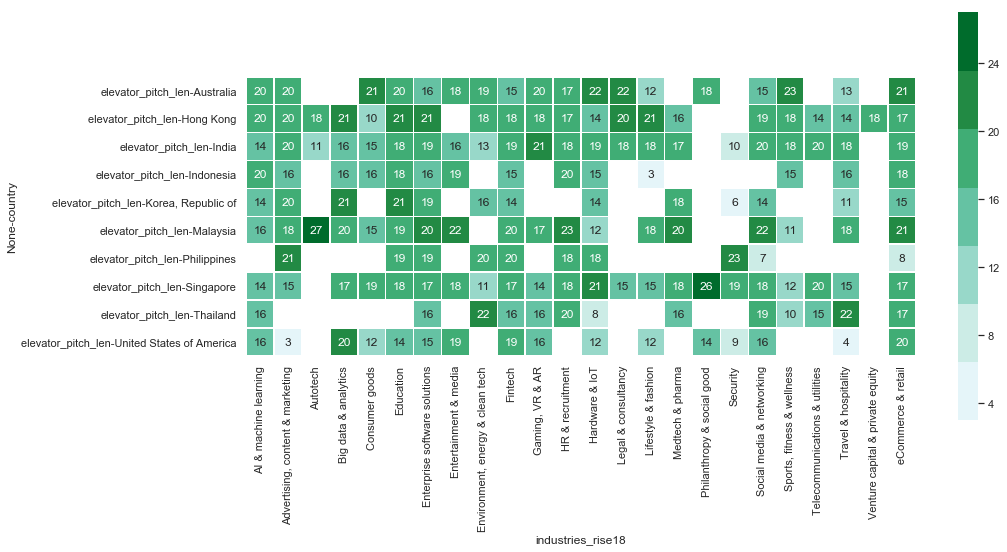

In [654]:
plot_industry_country(df_statups[df_statups['country'].isin(sort_by_country[:10])],
                      0,
#                       column_order=sort_by_country[:10],
#                       index_order=sort_by_industry,
                      column='country',
                      index='industries_rise18',
                      value='elevator_pitch_len',
                      aggfunc='median',
                      transpose=True,
                      n_colors=7,
#                       percentage=True,
                      show_values=True,
#                       vmin=0,
#                       fmt='.2f',
#                       vmax=.2,
                     )

# PR links analysis 

In [28]:
df_statups_urls = df_statups[['name', 'country', 'industries_rise18'] + [col for col in df_statups.columns if col.startswith('external_url')]]

In [29]:
df_statups_urls

,name,country,industries_rise18,external_urls_angellist,external_urls_crunchbase,external_urls_facebook,external_urls_homepage,external_urls_linkedin,external_urls_press_release,external_urls_twitter
74,12CM Global PTE. LTD.,Singapore,"Advertising, content & marketing",None,None,https://www.facebook.com/EchossStamp,http://www.12cmglobal.com,https://www.linkedin.com/company/12cm-global-p...,None,None
75,Anduin Transactions,United States of America,Fintech,https://angel.co/anduin-transactions,https://www.crunchbase.com/organization/anduin,None,https://www.anduintransact.com,https://www.linkedin.com/company/anduin-transa...,None,https://twitter.com/anduintransact
76,Banuba,Belarus,"Gaming, VR & AR",None,None,https://www.facebook.com/banubaapp,https://banuba.com,https://www.linkedin.com/company/banuba-develo...,None,None
77,BeautyMNL,Philippines,eCommerce & retail,None,None,None,https://beautymnl.com,None,None,https://twitter.com/beauty_MNL
78,BloomMe Ltd.,Hong Kong,Enterprise software solutions,https://angel.co/bloomme-1,https://www.crunchbase.com/organization/bloomme,https://www.facebook.com/BloomMeHK,http://www.bloomme.com.hk,https://www.linkedin.com/company/bloomme-hong-...,None,None
79,Brambang.com,Indonesia,eCommerce & retail,None,None,None,https://www.brambang.com,None,None,None
80,Branch,United States of America,Enterprise software solutions,https://angel.co/branch-metrics,https://www.crunchbase.com/organization/branch...,www.facebook.com/branchmetrics/,https://branch.io,https://www.linkedin.com/company/branch-metrics,None,https://twitter.com/branchmetrics
81,Datum,Switzerland,Fintech,None,None,https://www.facebook.com/datumnetwork/,https://datum.org,https://www.linkedin.com/company/13372038/,https://www.cio.com/article/3224533/data-manag...,@datumnetwork
82,DiscoveryIoT,India,Enterprise software solutions,None,None,https://www.facebook.com/DiscoveryIoTnetwork,https://discoveryiot.com/,https://www.linkedin.com/company/discoveryiot,https://readwrite.com/2018/05/24/iot-solution-...,https://twitter.com/discovery_iot
83,dotin.us,United States of America,AI & machine learning,https://angel.co/dotinus,https://www.crunchbase.com/organization/dotin-...,https://www.facebook.com/dotin.us,http://dotin.us,https://www.linkedin.com/company/10698682,https://angel.co/dotinus,https://twitter.com/dotin_us


In [83]:
df_statups_urls_count = (df_statups_urls.count().to_frame('count')
    .sort_values('count', ascending=False))
df_statups_urls_count

,count
name,772
country,772
industries_rise18,772
external_urls_homepage,772
external_urls_facebook,599
external_urls_twitter,524
external_urls_linkedin,515
external_urls_crunchbase,269
external_urls_press_release,254
external_urls_angellist,245


In [91]:
cols_url = [col for col in df_statups_urls_count.index if col.startswith('external_urls_')]

In [44]:
df_statups_urls_selected = df_statups_urls.groupby(['country']).count().query('name > 10')

In [47]:
df_statups_urls_selected_perc = df_statups_urls_selected.apply(lambda row: row/row['name'], axis=1)

In [259]:
def plot_urls(df, display_cols, n_colors=10,vmin=None, vmax=None):
    df = df[display_cols]
    f, ax = plt.subplots(figsize=(10, 10))
        # Generate a custom diverging colormap
#     cmap = sns.diverging_palette(220, 10, as_cmap=True)
#     cmap = sns.light_palette((210, 90, 60), input="husl")
    cmap = sns.color_palette("BuGn", n_colors)
    sns.heatmap(df.T,
                cmap=cmap,
                vmin=vmin,
                vmax=vmax,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .5},
                yticklabels=1
               )
    return df

,external_urls_homepage,external_urls_facebook,external_urls_twitter,external_urls_linkedin,external_urls_crunchbase,external_urls_press_release,external_urls_angellist
country,,,,,,,
Australia,1.0,0.848485,0.909091,0.696970,0.363636,0.333333,0.303030
China,1.0,0.571429,0.476190,0.761905,0.476190,0.523810,0.380952
Hong Kong,1.0,0.766234,0.584416,0.733766,0.337662,0.324675,0.318182
India,1.0,0.783019,0.792453,0.764151,0.339623,0.283019,0.424528
Indonesia,1.0,0.781250,0.781250,0.531250,0.375000,0.343750,0.187500
"Korea, Republic of",1.0,0.625000,0.437500,0.375000,0.218750,0.218750,0.187500
Malaysia,1.0,0.824561,0.526316,0.491228,0.280702,0.210526,0.140351
Philippines,1.0,0.826087,0.695652,0.608696,0.260870,0.217391,0.260870
Singapore,1.0,0.755814,0.651163,0.697674,0.360465,0.337209,0.325581


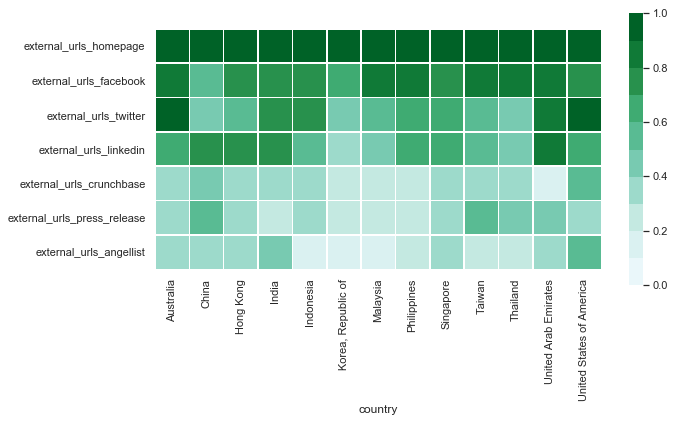

In [264]:
plot_urls(df_statups_urls_selected_perc,
         display_cols=cols_url,
        n_colors=10,
        vmin=0.0,
          vmax=1.0,
         )

,external_urls_homepage,external_urls_facebook,external_urls_twitter,external_urls_linkedin,external_urls_crunchbase,external_urls_press_release,external_urls_angellist
industries_rise18,,,,,,,
AI & machine learning,1.0,0.627119,0.677966,0.728814,0.406780,0.271186,0.423729
"Advertising, content & marketing",1.0,0.800000,0.760000,0.600000,0.320000,0.440000,0.260000
Big data & analytics,1.0,0.703704,0.666667,0.740741,0.333333,0.333333,0.444444
Consumer goods,1.0,0.846154,0.538462,0.692308,0.538462,0.461538,0.384615
Education,1.0,0.804878,0.658537,0.487805,0.243902,0.243902,0.195122
Enterprise software solutions,1.0,0.788732,0.633803,0.690141,0.366197,0.281690,0.267606
Entertainment & media,1.0,0.812500,0.625000,0.562500,0.312500,0.250000,0.125000
"Environment, energy & clean tech",1.0,0.789474,0.578947,0.684211,0.421053,0.263158,0.421053
Fintech,1.0,0.730769,0.711538,0.740385,0.355769,0.336538,0.317308


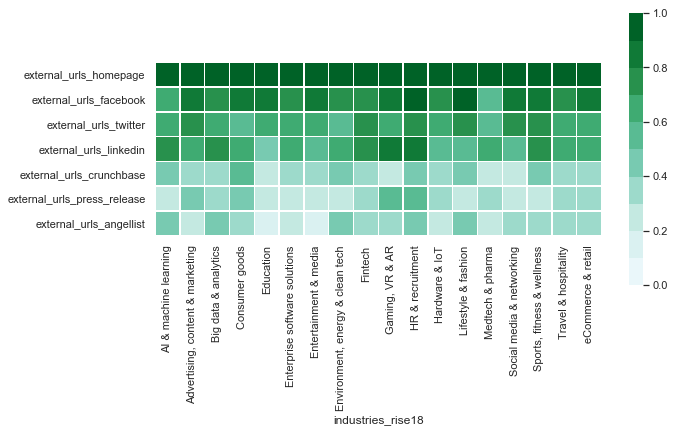

In [265]:
plot_urls((df_statups_urls.groupby(['industries_rise18'])
        .count()
        .query('name > 10')
        .transform(lambda row: row/row['name'],axis=1)
        ),
         display_cols=cols_url,
          n_colors=10,
          vmin=0.0,
          vmax=1.0,
         )


# industry - country

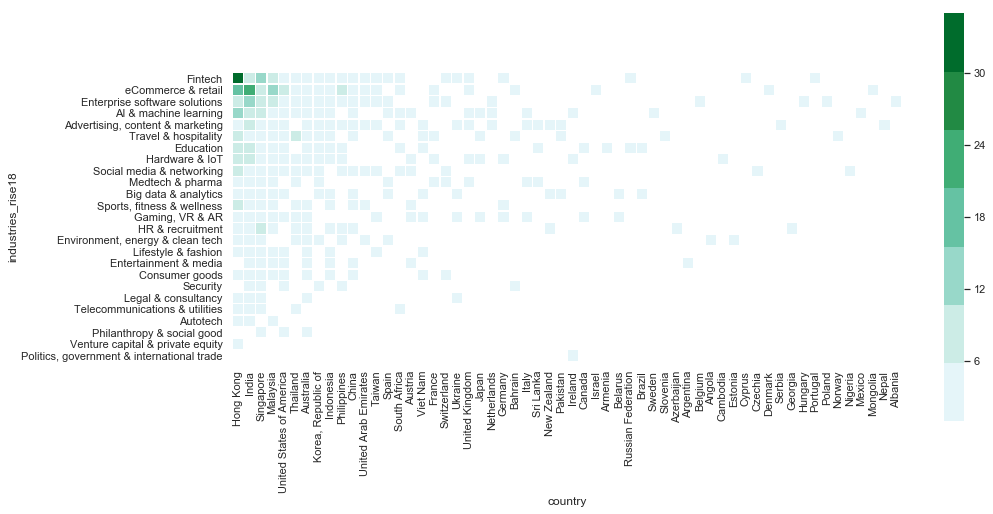

In [602]:
plot_industry_country(df_statups,
                      0,
                      sort_by_country,
                      sort_by_industry,
                      transpose=False,
                      n_colors=7,
                      vmin=1,
                      vmax=35,
                     )

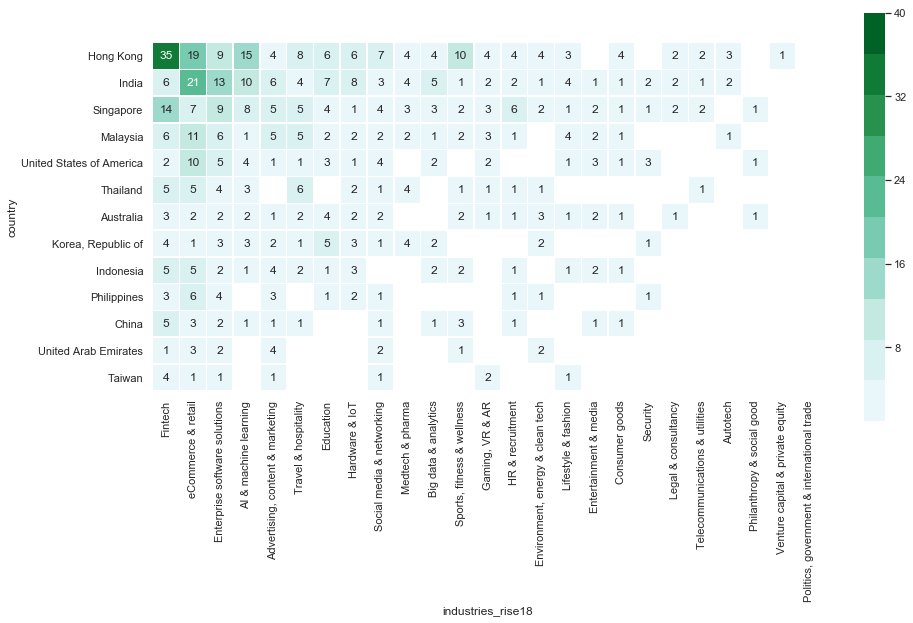

In [297]:
selected_countries = (df_statups.groupby('country').size() > 10)
selected_countries = selected_countries[selected_countries].index.tolist()
plot_industry_country(
    df_statups[df_statups.country.isin(selected_countries)], 
    0,
    [country for country in sort_by_country if country in selected_countries],
    sort_by_industry,
    transpose=True,
    show_values=True,
    title='',
    n_colors=10,
    vmin=1,
    vmax=40,
)

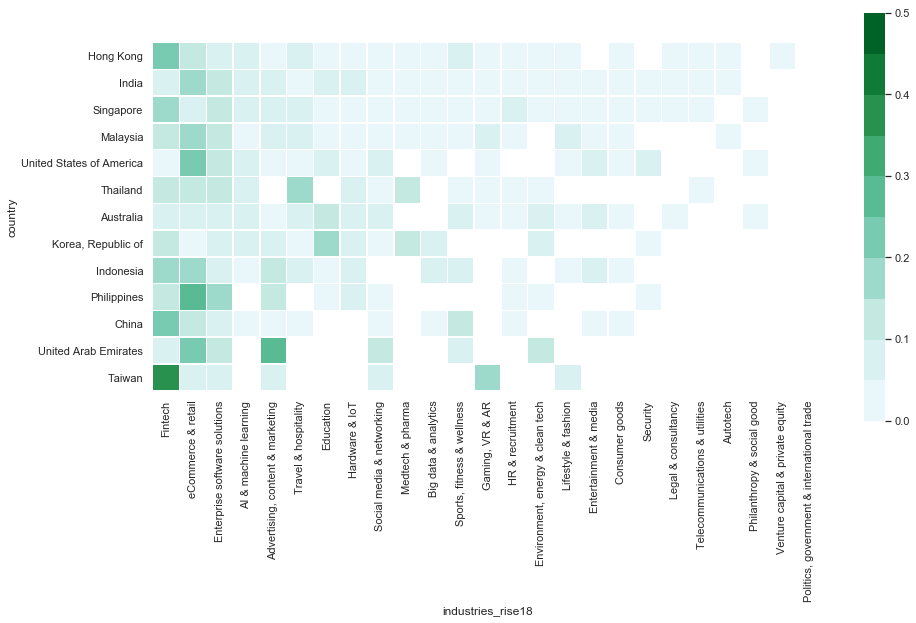

In [302]:
plot_industry_country(
    df_statups[df_statups.country.isin(selected_countries)], 
    0,
    [country for country in sort_by_country if country in selected_countries],
    sort_by_industry,
    percentage=True,
    percentage_axis=0,
    transpose=True,
    n_colors=10,
    vmin=0.0,
    vmax=0.5,
#     fmt='.2f',
#     show_values=True,
)

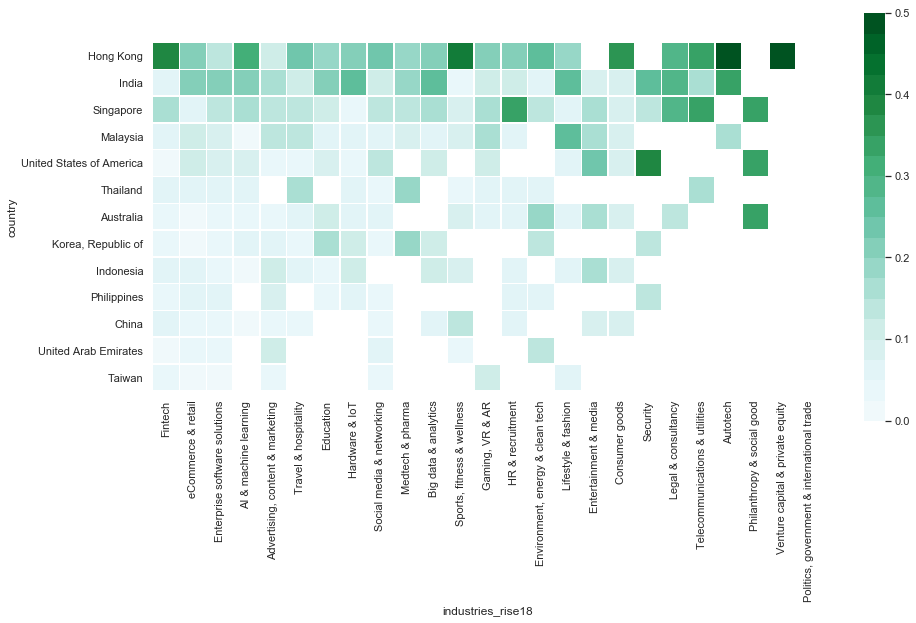

In [303]:
plot_industry_country(
    df_statups[df_statups.country.isin(selected_countries)], 
    0,
    [country for country in sort_by_country if country in selected_countries],
    sort_by_industry,
    percentage=True,
    percentage_axis=1,
    transpose=True,
    n_colors=20,
    vmin=0.0,
    vmax=.5,
#     show_values=True,
#     fmt='.2f',
)

# nlp on elevator pitch

In [533]:
def average_embedding(series):
    return series.apply(lambda vector_list: np.mean(vector_list, axis=0))

def text_to_nlp(text):
    return nlp(text)

def df_to_nlp_list(df, column='elevator_pitch'):
    return df[column].apply(lambda x: nlp(x))

def clean_nlp(df, column='elevator_pitch_nlp', name_column='name'):
    return df.apply(lambda row: [word for word in row[column]
                          if not (word.is_stop or word.is_punct or word.text.lower() in row[name_column].lower())]
             ,axis=1)

def get_vectors(df, column='elevator_pitch_nlp_clean'):
    return df.apply(lambda row: [word.vector for word in row[column]] ,axis=1)
#     return df.apply(lambda row: row[column].vector ,axis=1)

It takes some time to convert str into spacy nlp object

In [534]:
df_statups['elevator_pitch_nlp'] = df_to_nlp_list(df_statups)
df_statups['elevator_pitch_nlp_clean'] = clean_nlp(df_statups)
df_statups['elevator_pitch_nlp_clean_vectors'] = get_vectors(df_statups)
df_statups['elevator_pitch_nlp_clean_vectors_avg'] = average_embedding(df_statups['elevator_pitch_nlp_clean_vectors'])

/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [704]:
df_statups['elevator_pitch_nlp_uniq_lemma_'] = df_statups['elevator_pitch_nlp_clean'].apply(lambda sentence: list(set([word.lemma_ for word in sentence])))

/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [713]:
def get_most_common(df, n=20, unique_occurance=True):
#     elevator_pitch_sentences = df['elevator_pitch_nlp_clean'].tolist()
#     if unique_occurance:
#         elevator_pitch_vocabs_lemma_ = [list(set([word.lemma_ for word in sentence]))
#                                         for sentence in elevator_pitch_sentences]
#     else:
#         elevator_pitch_vocabs_lemma_ = [[word.lemma_ for word in sentence]
#                                         for sentence in elevator_pitch_sentences]
    
    elevator_pitch_vocabs = sum(df['elevator_pitch_nlp_uniq_lemma_'].tolist(), [])

    

#     elevator_pitch_vocabs_lower = [word.text.lower() for word in elevator_pitch_vocabs]
    ctr_lemma_ = Counter(elevator_pitch_vocabs)

    ctr_lemma_most_common = pd.DataFrame(ctr_lemma_.most_common(n), columns=['word', 'count'])

    return pd.DataFrame(ctr_lemma_most_common, columns=['word', 'count'])

In [732]:
get_most_common_all = get_most_common(df_statups, 10**9)

In [733]:
get_most_common_all.head(20)

,word,count
0,platform,177
1,-PRON-,138
2,service,74
3,solution,73
4,provide,66
5,help,64
6,app,63
7,ai,61
8,business,59
9,connect,52


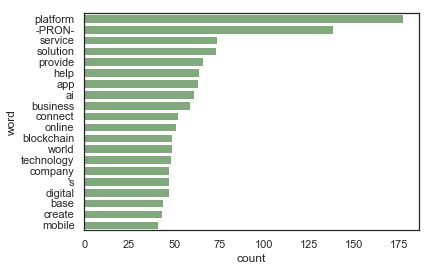

In [793]:
sns.barplot(x='count', y="word", data=get_most_common_all.head(20), palette=sns.xkcd_palette(['faded green']))

In [717]:
most_common_by_country = df_statups.groupby('country').apply(lambda grp: get_most_common(grp,10**9))
most_common_by_industry = df_statups.groupby('industries_rise18').apply(lambda grp: get_most_common(grp,1000))


In [785]:
df_blockchain = (most_common_by_country[most_common_by_country['word'].isin(['blockchain'])]
.sort_values('count', ascending=False)
# .sort_index(level=1, ascending=True)
)
df_blockchain

,,word,count
country,,,
Hong Kong,9,blockchain,12
Singapore,1,blockchain,12
United States of America,5,blockchain,5
China,1,blockchain,4
India,35,blockchain,4
Taiwan,3,blockchain,3
Australia,196,blockchain,1
Belgium,9,blockchain,1
France,33,blockchain,1


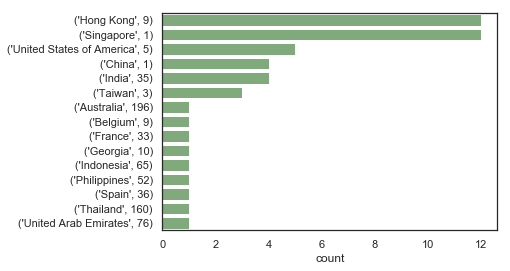

In [794]:
sns.barplot(x='count', y=df_blockchain.index, data=df_blockchain, palette=sns.xkcd_palette(['faded green']))

In [798]:
df_crypto = (most_common_by_country[most_common_by_country['word'].isin(['crypto'])]
.sort_values('count', ascending=False)
# .sort_index(level=1, ascending=True)
)
df_crypto

,,word,count
country,,,
Singapore,113,crypto,2
Cyprus,13,crypto,1
Hong Kong,349,crypto,1
Japan,20,crypto,1
Ukraine,44,crypto,1


In [802]:
df_otherconcepts = get_most_common_all[get_most_common_all['word'].isin(['b2b',
                                                      'b2c',
                                                      'c2c',
                                                      'iot',
                                                      'coin',
                                                      'crypto',
                                                      'cryptocurrency',
                                                      'cloud',
                                                      'distribute',
                                                    'blockchain',
                                                     ])]
df_otherconcepts

,word,count
11,blockchain,49
88,iot,15
96,cloud,14
167,cryptocurrency,9
231,b2b,7
279,crypto,6
396,b2c,4
851,distribute,2
852,coin,2


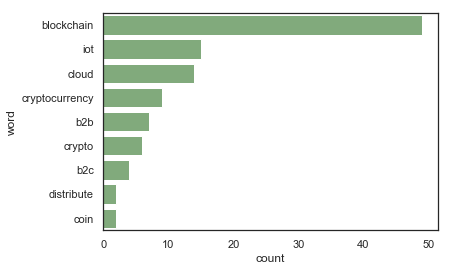

In [803]:
sns.barplot(x='count', y='word', data=df_otherconcepts, palette=sns.xkcd_palette(['faded green']))

In [730]:
most_common_by_country[most_common_by_country['word'].isin(['iot'])]

,,word,count
country,,,
Hong Kong,46,iot,5
India,25,iot,6
Indonesia,205,iot,1
Singapore,561,iot,1
Thailand,136,iot,1
Viet Nam,33,iot,1


In [763]:
df_statups[df_statups['elevator_pitch'].str.lower().str.contains('crypto')]

,city,country,elevator_pitch,external_urls_angellist,external_urls_crunchbase,external_urls_facebook,external_urls_homepage,external_urls_linkedin,external_urls_press_release,external_urls_twitter,...,tracks_rise17,tracks_rise18,tracks_ws17,tracks_ws18,elevator_pitch_len,elevator_pitch_nlp,elevator_pitch_nlp_clean,elevator_pitch_nlp_clean_vectors,elevator_pitch_nlp_clean_vectors_avg,elevator_pitch_nlp_uniq_lemma_
105,Jakarta,Indonesia,Blockchain-based point-of-sale (“POS”) solutio...,None,https://www.crunchbase.com/organization/pundi-...,https://www.facebook.com/pundixlabs,https://www.pundix.com,https://www.linkedin.com/company/pundipundi,https://www.pundix.com/press,https://twitter.com/PundiXLabs,...,NaN,GROWTH,NaN,NaN,15,"(Blockchain, -, based, point, -, of, -, sale, ...","[Blockchain, based, point, sale, POS, solution...","[[2.3042626, 2.9389412, 2.2543201, -0.01944072...","[0.8331743, 1.6730341, 0.15034476, 0.94307655,...","[base, retail, enable, store, multi, point, cr..."
132,Moscow,Russian Federation,Cryptocurrecncy mining project based on the nu...,None,None,https://www.facebook.com/atomine,https://atomine.io/,https://www.linkedin.com/company/atomine,https://hackernoon.com/whats-wrong-with-mining...,https://twitter.com/atomine_project,...,NaN,BETA,NaN,NaN,8,"(Cryptocurrecncy, mining, project, based, on, ...","[Cryptocurrecncy, mining, project, based, nucl...","[[0.4271627, 3.10876, 1.831619, 1.9932635, -2....","[-0.19544725, 0.061793935, 0.7624267, 1.356759...","[base, nuclear, energy, project, mining, crypt..."
136,Hong Kong,Hong Kong,Billion is designed to become a truly decentra...,None,None,https://www.facebook.com/billionappl,https://billionapp.com,https://www.linkedin.com/company/billionapp,None,https://twitter.com/billionappl,...,NaN,BETA,NaN,NaN,21,"(Billion, is, designed, to, become, a, truly, ...","[designed, truly, decentralized, cryptocurrenc...","[[0.60436064, -0.9868972, 0.45096296, 2.736185...","[0.7777287, 0.6648797, 1.993024, 1.0377984, -0...","[store, earn, cryptocurrency, decentralized, u..."
167,Shenzhen,China,A blockchain as a service provider that also b...,None,None,https://www.facebook.com/fiiipay,https://www.fiii.io,https://www.linkedin.com/company/fiiipay,None,https://twitter.com/fiiipay,...,NaN,BETA,NaN,NaN,20,"(A, blockchain, as, a, service, provider, that...","[blockchain, service, provider, build, digital...","[[-0.54886234, 0.7752217, 0.4565109, 3.275442,...","[-0.27420044, 0.44359523, 0.08018823, 0.813932...","[terminal, cryptocurrency, build, wallet, acce..."
169,Hong Kong,Hong Kong,Capital markets kickass rockstars building equ...,https://angel.co/finfabrik,https://www.crunchbase.com/organization/finfabrik,https://www.facebook.com/finfabrik,https://www.finfabrik.com,https://www.linkedin.com/company/finfabrik,None,https://twitter.com/finfabrik,...,NaN,BETA,NaN,NaN,16,"(Capital, markets, kickass, rockstars, buildin...","[Capital, markets, kickass, rockstars, buildin...","[[0.41349137, 1.7934387, -2.1030366, 4.405785,...","[-0.36993715, 1.3412594, 0.14944842, 0.6541978...","[market, solve, crypto, great, world, platform..."
216,Minsk,Belarus,All-in-one dashboard for managing and monitori...,https://angel.co/minerboard,https://www.crunchbase.com/organization/minerb...,https://www.facebook.com/Minerboard,http://minerboard.com,https://www.linkedin.com/company/minerboard,https://docs.google.com/document/d/1FOUA-XcCHf...,https://twitter.com/Minerboard,...,NaN,BETA,NaN,NaN,19,"(All, -, in, -, one, dashboard, for, managing,...","[All, dashboard, managing, monitoring, cryptoc...","[[0.75005376, 1.9728485, 0.58609706, -0.208174...","[-0.1879403, 0.54651576, 0.17102522, 1.3708783...","[easy, cryptocurrency, monitoring, way, dashbo..."
220,London,United Kingdom,n.exchange is the planet's easiest solution fo...,https://angel.co/nexchange-io,None,https://www.facebook.com/n.exchange1,https://n.exchange,https://www.linkedin.com/company/n-exchange,None,https://twitter.com/cryptoNexchange,...,NaN,BETA,NaN

In [767]:
df_statups[df_statups['elevator_pitch_nlp_uniq_lemma_'].apply(lambda x: 'cryptocurrency' in x)]

,city,country,elevator_pitch,external_urls_angellist,external_urls_crunchbase,external_urls_facebook,external_urls_homepage,external_urls_linkedin,external_urls_press_release,external_urls_twitter,...,tracks_rise17,tracks_rise18,tracks_ws17,tracks_ws18,elevator_pitch_len,elevator_pitch_nlp,elevator_pitch_nlp_clean,elevator_pitch_nlp_clean_vectors,elevator_pitch_nlp_clean_vectors_avg,elevator_pitch_nlp_uniq_lemma_
105,Jakarta,Indonesia,Blockchain-based point-of-sale (“POS”) solutio...,None,https://www.crunchbase.com/organization/pundi-...,https://www.facebook.com/pundixlabs,https://www.pundix.com,https://www.linkedin.com/company/pundipundi,https://www.pundix.com/press,https://twitter.com/PundiXLabs,...,NaN,GROWTH,NaN,NaN,15,"(Blockchain, -, based, point, -, of, -, sale, ...","[Blockchain, based, point, sale, POS, solution...","[[2.3042626, 2.9389412, 2.2543201, -0.01944072...","[0.8331743, 1.6730341, 0.15034476, 0.94307655,...","[base, retail, enable, store, multi, point, cr..."
136,Hong Kong,Hong Kong,Billion is designed to become a truly decentra...,None,None,https://www.facebook.com/billionappl,https://billionapp.com,https://www.linkedin.com/company/billionapp,None,https://twitter.com/billionappl,...,NaN,BETA,NaN,NaN,21,"(Billion, is, designed, to, become, a, truly, ...","[designed, truly, decentralized, cryptocurrenc...","[[0.60436064, -0.9868972, 0.45096296, 2.736185...","[0.7777287, 0.6648797, 1.993024, 1.0377984, -0...","[store, earn, cryptocurrency, decentralized, u..."
167,Shenzhen,China,A blockchain as a service provider that also b...,None,None,https://www.facebook.com/fiiipay,https://www.fiii.io,https://www.linkedin.com/company/fiiipay,None,https://twitter.com/fiiipay,...,NaN,BETA,NaN,NaN,20,"(A, blockchain, as, a, service, provider, that...","[blockchain, service, provider, build, digital...","[[-0.54886234, 0.7752217, 0.4565109, 3.275442,...","[-0.27420044, 0.44359523, 0.08018823, 0.813932...","[terminal, cryptocurrency, build, wallet, acce..."
216,Minsk,Belarus,All-in-one dashboard for managing and monitori...,https://angel.co/minerboard,https://www.crunchbase.com/organization/minerb...,https://www.facebook.com/Minerboard,http://minerboard.com,https://www.linkedin.com/company/minerboard,https://docs.google.com/document/d/1FOUA-XcCHf...,https://twitter.com/Minerboard,...,NaN,BETA,NaN,NaN,19,"(All, -, in, -, one, dashboard, for, managing,...","[All, dashboard, managing, monitoring, cryptoc...","[[0.75005376, 1.9728485, 0.58609706, -0.208174...","[-0.1879403, 0.54651576, 0.17102522, 1.3708783...","[easy, cryptocurrency, monitoring, way, dashbo..."
220,London,United Kingdom,n.exchange is the planet's easiest solution fo...,https://angel.co/nexchange-io,None,https://www.facebook.com/n.exchange1,https://n.exchange,https://www.linkedin.com/company/n-exchange,None,https://twitter.com/cryptoNexchange,...,NaN,BETA,NaN,BETA,14,"(n.exchange, is, the, planet, 's, easiest, sol...","[planet, 's, easiest, solution, Cryptocurrency...","[[-0.35167557, 3.5647736, 0.21294332, 3.37816,...","[0.6063246, 1.3435086, 0.95161223, 0.53910017,...","[individual, easy, cryptocurrency, planet, ali..."
263,San Juan,Philippines,Success Mall is Asia's blockchain marketplace ...,None,None,www.facebook.com/successmallph,https://www.successmall.ph,https://www.linkedin.com/in/success-mall-97609...,None,https://twitter.com/successmall_ph,...,ALPHA,BETA,NaN,NaN,16,"(Success, Mall, is, Asia, 's, blockchain, mark...","[Asia, 's, blockchain, marketplace, accepts, c...","[[-1.232643, 1.2050384, 1.2495182, 4.9087977, ...","[-0.08589582, 1.4337032, 0.3767195, 1.1617405,...","[payment, cryptocurrency, loyal, asia, consume..."
482,Dubai,United Arab Emirates,Provides websites & applications an alternate/...,https://angel.co/gath3r-io,None,https://www.facebook.com/Gath3r,https://www.Gath3r.io,https://www.linkedin.com/company/gath3r-io,None,https://twitter.com/Gath3r_io,...,NaN,ALPHA,NaN,NaN,15,"(Provides, websites, &, applications, an, alte...","[Provides, websi

In [702]:
most_common_by_country[most_common_by_country['word'].isin(['ai'])].sort_values('count', ascending=False)

,,word,count
country,,,
Hong Kong,2,ai,17
India,5,ai,10
Singapore,4,ai,10
United States of America,21,ai,3
Thailand,15,ai,3
China,3,ai,3
"Korea, Republic of",22,ai,2
Japan,2,ai,2
Italy,12,ai,1


In [703]:
most_common_by_country[most_common_by_country['word'].isin(['platform'])].sort_values('count', ascending=False)

,,word,count
country,,,
Hong Kong,0,platform,38
India,0,platform,28
Malaysia,1,platform,16
Singapore,0,platform,15
Thailand,0,platform,12
United States of America,0,platform,9
Indonesia,1,platform,8
United Arab Emirates,0,platform,7
Australia,0,platform,6


In [723]:
most_common_by_country_top20 = df_statups.groupby('country').apply(lambda grp: get_most_common(grp,20))
most_common_by_industry_top20 = df_statups.groupby('industries_rise18').apply(lambda grp: get_most_common(grp,20))


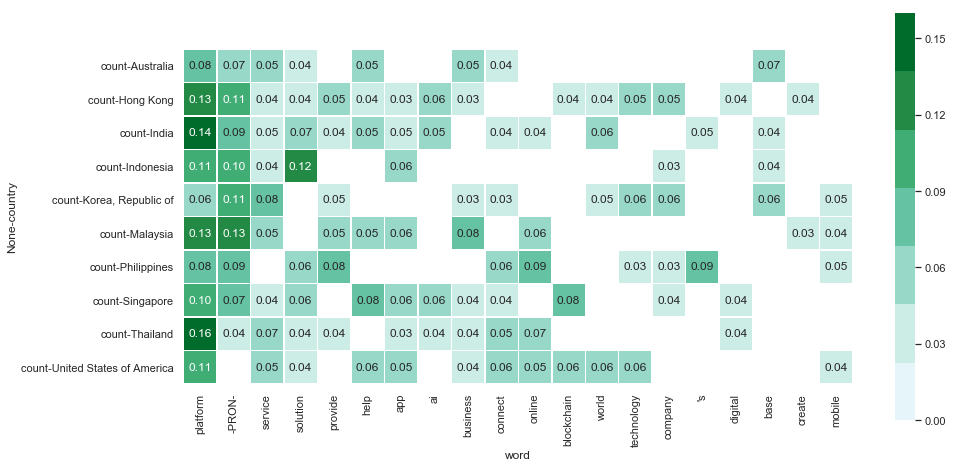

In [728]:
plot_industry_country(most_common_by_country_top20.loc[sort_by_country[:10], :].reset_index(),
                      0,
#                       column_order=sort_by_country[:10],
                      index_order=get_most_common(df_statups)['word'].tolist(),
                      column='country',
                      index='word',
                      value='count',
                      aggfunc='sum',
                      transpose=True,
                      n_colors=7,
                      percentage=True,
                      show_values=True,
                      vmin=0,
                      fmt='.2f',
#                       vmax=.2,
                     )

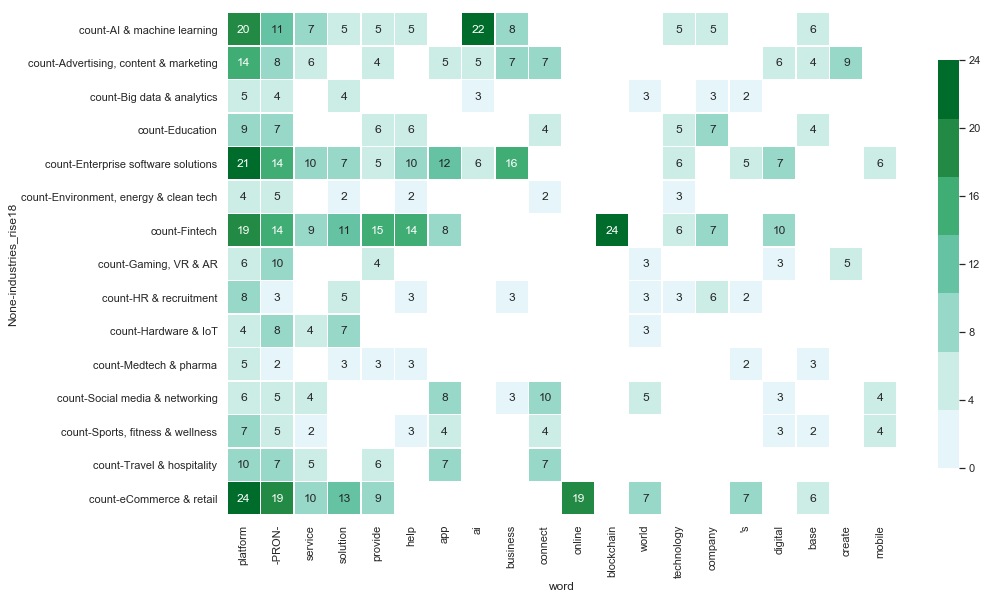

In [729]:
plot_industry_country(most_common_by_industry_top20.loc[sort_by_industry[:15], :].reset_index(),
                      0,
#                       column_order=sort_by_industry[:],
                      index_order=get_most_common(df_statups)['word'].tolist(),
                      column='industries_rise18',
                      index='word',
                      value='count',
                      aggfunc='sum',
                      transpose=True,
                      n_colors=7,
                      percentage=False,
                      show_values=True,
                      vmin=0,
#                       fmt='.2f',
#                       vmax=.2,
                     )

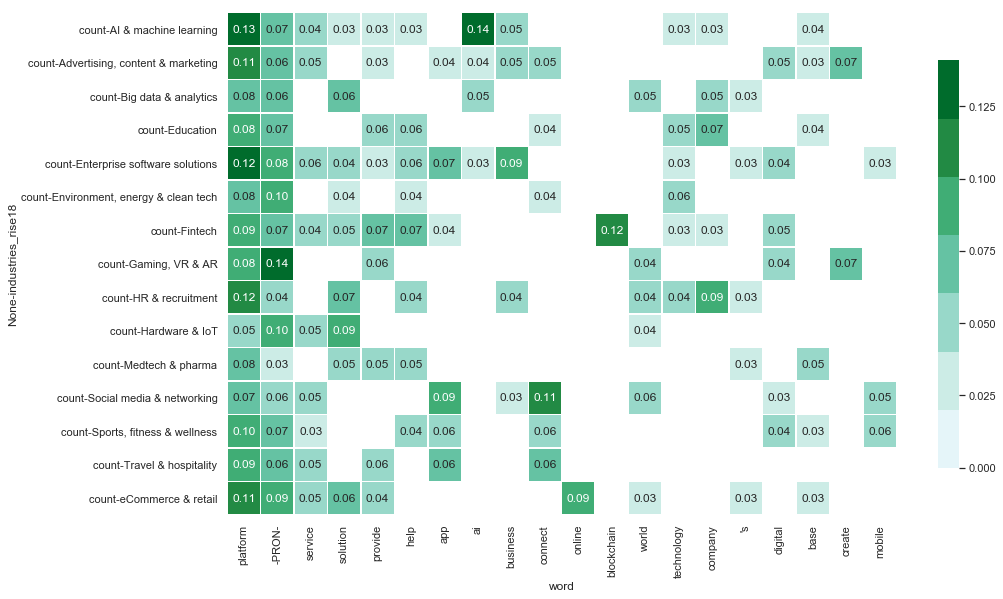

In [769]:
plot_industry_country(most_common_by_industry_top20.loc[sort_by_industry[:15], :].reset_index(),
                      0,
#                       column_order=sort_by_industry[:],
                      index_order=get_most_common(df_statups)['word'].tolist(),
                      column='industries_rise18',
                      index='word',
                      value='count',
                      aggfunc='sum',
                      transpose=True,
                      n_colors=7,
                      percentage=True,
                      show_values=True,
                      vmin=0,
                      fmt='.2f',
#                       vmax=.2,
                     )

# tsn-e

In [166]:
from sklearn.manifold import TSNE
from sklearn import cluster

In [305]:
def filter_industries(df, top_x_industries=10):
    top_x_industries_names = (df.groupby(['industries_rise18']).size().to_frame('count')
    .sort_values('count', ascending=False).head(top_x_industries)
    .reset_index()['industries_rise18'].tolist())
    print('filtered: {}'.format( top_x_industries_names))
    return df[df['industries_rise18'].isin(top_x_industries_names)]

In [315]:
def train_tsne(_df_statups, top_x_industries=10, n_iter=2000):
    tsne = TSNE(n_components=2,
                perplexity=50.0,
                early_exaggeration=12.0,
                learning_rate=200.0,
                n_iter=n_iter,
                n_iter_without_progress=300,
                min_grad_norm=1e-07,
                metric='euclidean',
                init='pca',
                verbose=0,
                random_state=None,
                method='barnes_hut',
                angle=0.5)
    df_statups = _df_statups.copy()
    if isinstance(top_x_industries, int):
        df_statups = filter_industries(df_statups, top_x_industries)
        
    tsne_representation = tsne.fit_transform(np.vstack(df_statups['elevator_pitch_nlp_clean_vectors_avg']
                                            .values
                                             .tolist())
                                            )

    df_statups['tsne_representation'] = pd.Series(tsne_representation.tolist())

    df_statups[['tsne_representation_x', 'tsne_representation_y']] = pd.DataFrame(
        tsne_representation.tolist())
    return df_statups

### Visualize with bokeh

In [317]:
# Bokeh
from bokeh.io import output_notebook, save
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool
# color
import bokeh.models as bmo
from bokeh.palettes import d3

import webbrowser as wb

In [276]:
output_notebook()

Loading BokehJS ...

### making different groups (industry)

In [277]:
def create_bohek_source(df, groupby=['industries_rise18'],
                        source_column_x='tsne_representation_x',
                        source_column_y='tsne_representation_y',
                       ):
    return df.groupby(groupby).apply(lambda grp: {
        'source': ColumnDataSource(
        data=dict(
            x = grp[source_column_x],
            y = grp[source_column_y],
            name = grp['name'],
            industries_rise18 = grp['industries_rise18'],
            country = grp['country'],
            elevator_pitch = grp['elevator_pitch']
        )
    ), 
        'source_groupby': groupby,
        'source_name': grp.name
    })

In [299]:
def filter_source(df, sources, top_x_industries=10):
    top_x_industries_names = (df.groupby(['industries_rise18']).size().to_frame('count')
    .sort_values('count', ascending=False).head(top_x_industries)
    .reset_index()['industries_rise18'].tolist())
    print('filtered: {}'.format( top_x_industries_names))
    return [source for source in sources if source['source_name'] in top_x_industries_names]

In [318]:
def tsne_e2e(_df_statups, top_x_industries=10, n_iter=2000):
    df_statups = _df_statups.copy()
    df_statups = train_tsne(_df_statups, top_x_industries, n_iter=n_iter)
    sources = create_bohek_source(df_statups)

    ### color palette

    # use whatever palette you want...
    palette = d3['Category20'][20] + d3['Category20b'][20]
    color_map = bmo.CategoricalColorMapper(factors=df_statups['industries_rise18'].unique(),
                                       palette=palette)

    hover_tsne = HoverTool(
    #     names=["test", "train"], 
                           tooltips=[("name", "@name"), 
                                     ("industries_rise18", "@industries_rise18"), 
                                     ("country", "@country"), 
                                     ("elevator_pitch", "@elevator_pitch")])
    tools_tsne = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
    plot_tsne = figure(plot_width=600, plot_height=600, tools=tools_tsne, title='tsne')

    for i, source in enumerate(sources):
        plot_tsne.square('x', 'y', size=7, fill_color=color_map.palette[i],
                         alpha=0.9, line_width=0, source=source['source'], name=source['source_name'])
    # plot_tsne.circle('x', 'y', size=10, fill_color='colors', 
    #                  alpha=0.5, line_width=0, source=source_train, name="train")

#     show(plot_tsne)
    save_path = save(plot_tsne, filename='./tsne_top_x_industries{}-n_iter{}.html'.format(top_x_industries,n_iter))
    print ('saved html in: {}'.format(save_path))
    wb.open_new_tab(save_path)
    return (df_statups, top_x_industries, plot_tsne, sources, save_path)

In [319]:
scenario = []
for i in range(3, 11):
    scenario.append(tsne_e2e(df_statups, top_x_industries=i, n_iter=2000))

filtered: ['Fintech', 'eCommerce & retail', 'Enterprise software solutions']


/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/site-packages/bokeh/io/saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/ericng/anaconda/envs/startup-funding-monitor/lib/python3.6/site-packages/bokeh/io/saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


saved html in: /Users/ericng/Workspace/startup_news/tsne_top_x_industries3-n_iter2000.html
filtered: ['Fintech', 'eCommerce & retail', 'Enterprise software solutions', 'AI & machine learning']
saved html in: /Users/ericng/Workspace/startup_news/tsne_top_x_industries4-n_iter2000.html
filtered: ['Fintech', 'eCommerce & retail', 'Enterprise software solutions', 'AI & machine learning', 'Advertising, content & marketing']
saved html in: /Users/ericng/Workspace/startup_news/tsne_top_x_industries5-n_iter2000.html
filtered: ['Fintech', 'eCommerce & retail', 'Enterprise software solutions', 'AI & machine learning', 'Advertising, content & marketing', 'Travel & hospitality']
saved html in: /Users/ericng/Workspace/startup_news/tsne_top_x_industries6-n_iter2000.html
filtered: ['Fintech', 'eCommerce & retail', 'Enterprise software solutions', 'AI & machine learning', 'Advertising, content & marketing', 'Travel & hospitality', 'Education']
saved html in: /Users/ericng/Workspace/startup_news/tsne_to

# Get more data - angelco 

In [ ]:
import requests
from bs4 import Beautifulsoup

In [ ]:
requests